In [52]:
import pandas as pd 
import seaborn as sn
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
df_A = pd.read_csv('house-data.csv')
df_A.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
df_A.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [27]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [28]:
df = df_A.drop(columns=['id', 'date'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


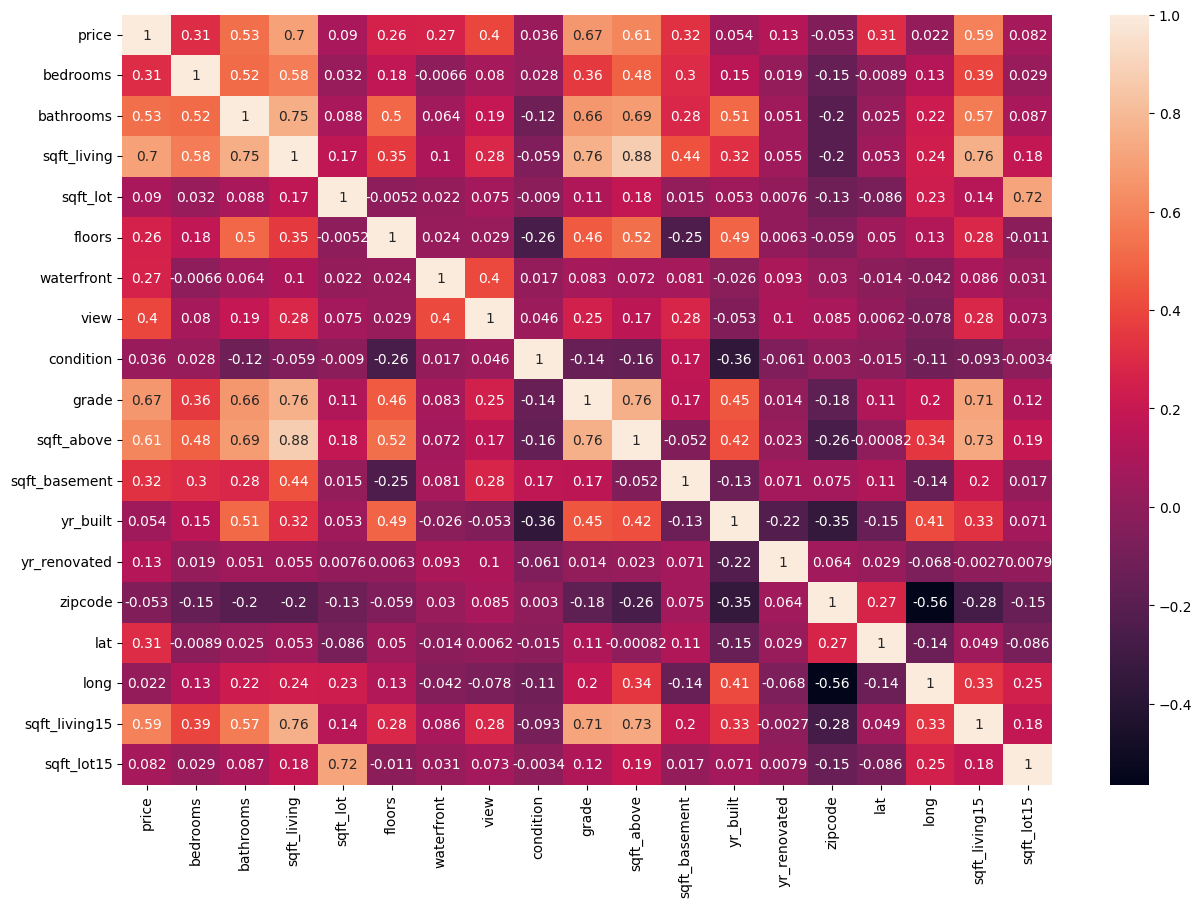

sqft_living    0.702035
Name: price, dtype: float64


In [29]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sn.heatmap(corr_matrix, annot=True)
plt.show()
corr_with_price = df.corr()['price'].sort_values(ascending=False)
highest_corr = corr_with_price[1:] 
print(highest_corr.head(1))

## Simple Regression

In [30]:
X = df[['sqft_living']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [31]:
def adjustedR2(r2, n, k):
    return r2 - (k-1)/(n-k)*(1-r2)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adj_r2 = adjustedR2(r2, n, k)


In [32]:
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")

RMSE: 276559.1746114672
R-squared: 0.4940690538908906
Adjusted R-squared: 0.4940690538908906


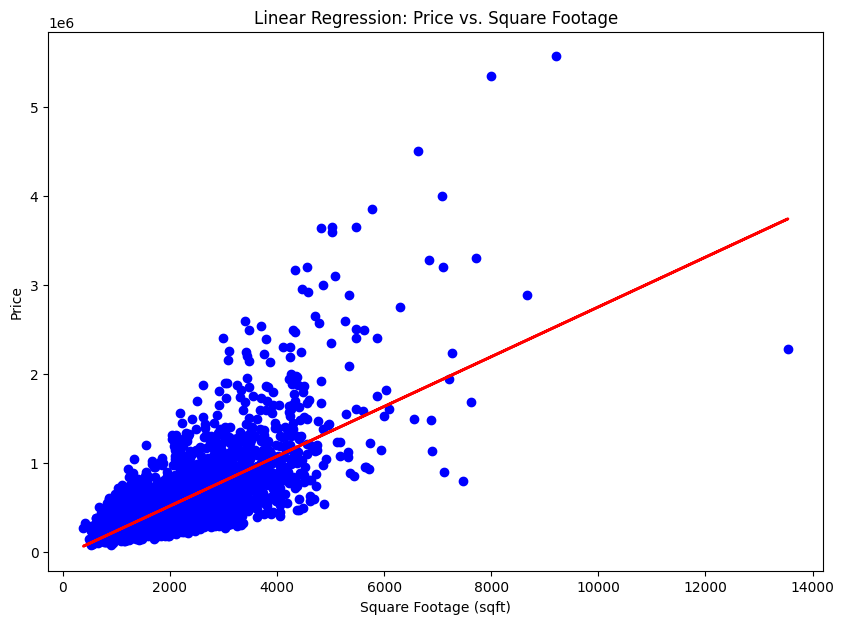

In [35]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, color='blue') 
plt.plot(X_test, y_pred, color='red', linewidth=2) 
plt.xlabel('Square Footage (sqft)')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs. Square Footage')
plt.show()


In [ ]:
##Poor Fit :(

## Multiple Regression 1
#### Taking the top 10 correlations

In [37]:
highest_corr = corr_with_price[1:11] 
print(highest_corr)

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
Name: price, dtype: float64


In [39]:
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 
             'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront']
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
def adjustedR2(r2, n, k):
    return r2 - (k-1)/(n-k)*(1-r2)
r2 = r2_score(y_test, y_pred)
n = len(y_test)
k = X_test.shape[1]
adj_r2 = adjustedR2(r2, n, k)
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adj_r2}")
coefficients = model.coef_
coeff_df = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])
print(coeff_df)

RMSE: 226416.15009696418
R-squared: 0.660898346978002
Adjusted R-squared: 0.6601907386132447
                Coefficient
sqft_living   -3.282037e+13
grade          7.701955e+04
sqft_above     3.282037e+13
sqft_living15  7.902360e+00
bathrooms     -1.080594e+04
view           6.818492e+04
sqft_basement  3.282037e+13
bedrooms      -2.317503e+04
lat            6.631436e+05
waterfront     5.845942e+05


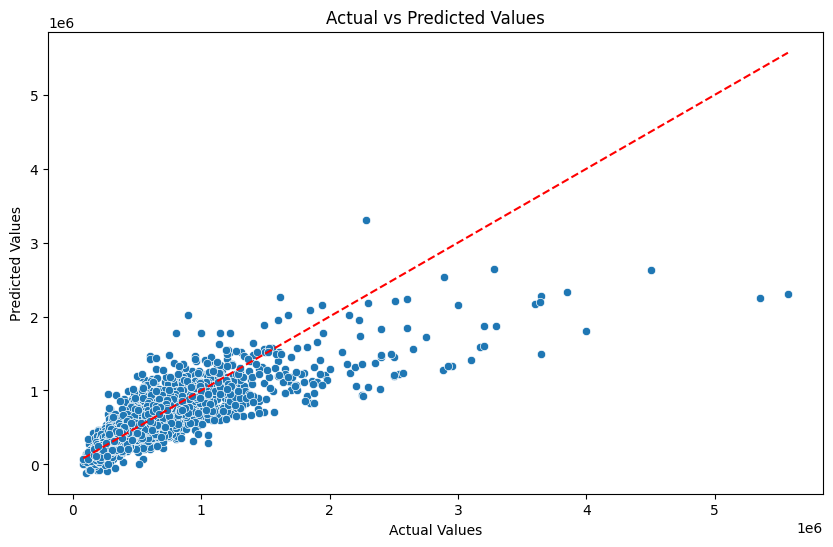

In [41]:
plt.figure(figsize=(10, 6))
sn.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--') 
plt.show()

## Multiple Regression 2

#### All Features

In [44]:
X_all = df.drop(columns=['price'])  
y = df['price']
X_train_all, X_test_all, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)
model_all = LinearRegression()
model_all.fit(X_train_all, y_train)
y_pred_all = model_all.predict(X_test_all)
rmse_all = np.sqrt(mean_squared_error(y_test, y_pred_all))
r2_all = r2_score(y_test, y_pred_all)
n_all = X_test_all.shape[0]
k_all = X_test_all.shape[1]
adj_r2_all = adjustedR2(r2_all, n_all, k_all)
print(f"Root Mean Squared Error (RMSE): {rmse_all}")
print(f"R-squared (test set): {r2_all}")
print(f"Adjusted R-squared (test set): {adj_r2_all}")
coefficients_all = model_all.coef_
coeff_df_all = pd.DataFrame(coefficients_all, index=X_all.columns, columns=['Coefficient'])
print(coeff_df_all)


Root Mean Squared Error (RMSE): 212539.5166381758
R-squared (test set): 0.7011904448878463
Adjusted R-squared (test set): 0.7000104768421073
                 Coefficient
bedrooms       -34335.418739
bathrooms       44564.528881
sqft_living       109.015817
sqft_lot            0.088847
floors           7003.129520
waterfront     562413.070005
view            53641.107022
condition       24526.710105
grade           94567.891697
sqft_above         70.022741
sqft_basement      38.993076
yr_built        -2680.768897
yr_renovated       20.415633
zipcode          -552.253038
lat            595968.122144
long          -194585.724048
sqft_living15      21.214331
sqft_lot15         -0.325832


## Backwards Regression 

In [46]:
X = df.drop(columns=['price'])
y = df['price']
X = sm.add_constant(X)

In [49]:

def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        X_features = X[features]
        model = sm.OLS(y, X_features).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        
        if max_p_value >= significance_level:
            worst_feature = p_values.idxmax()
            features.remove(worst_feature)
        else:
            break
    final_model = sm.OLS(y, X[features]).fit()
    return features, final_model.pvalues
selected_features, p_values = backward_elimination(X, y)
print("P-values of the selected features:")
print(p_values[selected_features])


P-values of the selected features:
const             4.674199e-02
bedrooms          1.547462e-79
bathrooms         6.294212e-42
sqft_living       0.000000e+00
sqft_lot          8.223174e-03
waterfront       4.321567e-241
view             1.953311e-133
condition         1.038447e-28
grade             0.000000e+00
sqft_above       3.091598e-255
sqft_basement     1.355670e-54
yr_built         1.460332e-283
yr_renovated      3.317639e-08
zipcode           1.529001e-68
lat               0.000000e+00
long              2.817205e-61
sqft_living15     9.567473e-10
sqft_lot15        1.231228e-07
dtype: float64


In [51]:
X_final = X[selected_features]
X_train_final, X_test_final, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
model_final = LinearRegression()
model_final.fit(X_train_final, y_train)
y_pred_final = model_final.predict(X_test_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))
r2_final = r2_score(y_test, y_pred_final)
adj_r2_final = adjustedR2(r2_final, X_test_final.shape[0], X_test_final.shape[1])
print(f"Root Mean Squared Error (RMSE): {rmse_final}")
print(f"R-squared (test set): {r2_final}")
print(f"Adjusted R-squared (test set): {adj_r2_final}")


Root Mean Squared Error (RMSE): 212548.77384015
R-squared (test set): 0.701164414898815
Adjusted R-squared (test set): 0.6999843440633399


## Polynomial Regression

In [58]:
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")



Train RMSE: 147260.13532809736
Test RMSE: 174607.92678046413
Train R-squared: 0.834016245300884
Test R-squared: 0.7983292026964348


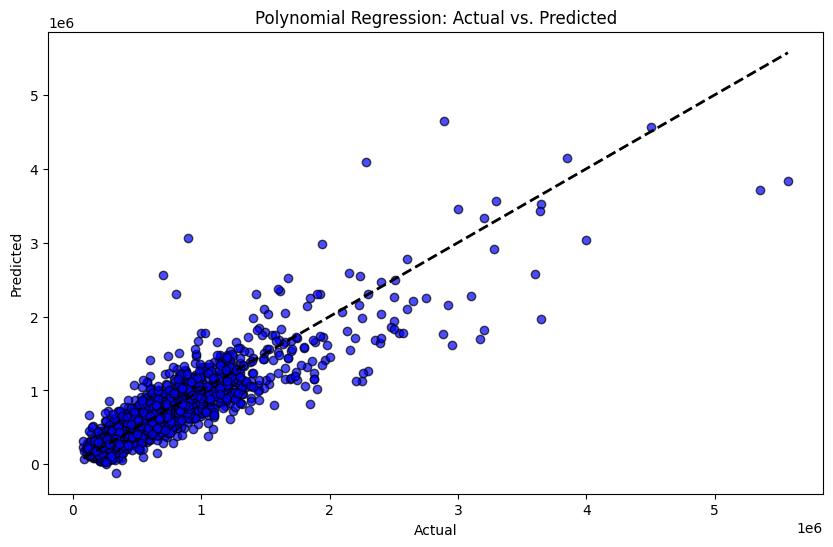

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.show()
